In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA 
from mpl_toolkits import mplot3d

In [18]:
def loadFastText(filename, N):
    sentences = []
    vectors = []
    with open(filename, encoding="utf-8") as file:
        data = json.load(file)
        
        count = 1
        for k , v in data.items():
            if count > N :
                break
            # print(k)
            sentences.append(k)
            vectors.append(v)
            count += 1
    return sentences, vectors

In [19]:
def loadBert(filename):
    sentences = []
    vectors = []
    with open(filename, encoding="utf-8") as file:
        data = json.load(file)

        for k , v in data.items():
            sentences.append(k)
            vectors.append(v)
    return sentences, vectors

In [20]:
def plotData2D(data, kmeans):
    plt.scatter(data[:, 0], data[:, 1], marker='.')
    fig = plt.figure(figsize=(10, 8))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
    ax = fig.add_subplot(1, 1, 1)
    for k, col in zip(range(len(kmeans.cluster_centers_)), colors):
        my_members = (kmeans.labels_ == k)
        cluster_center = kmeans.cluster_centers_[k]
        ax.plot(data[my_members, 0], data[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    plt.show()

In [21]:
def plotData3D(data, pred_label, N):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='.')
    plt.show()

In [22]:
def elbow(data_std, n_dim, dim_reduction_medthod):
    start = time.time()

    data_reduction = data_std
    if dim_reduction_medthod == "pca":
        pca = PCA(n_components = n_dim)
        data_reduction = pca.fit_transform(data_std)
    if dim_reduction_medthod == "ica":
        ica = FastICA(n_components = n_dim)
        data_reduction = ica.fit_transform(data_std)

    k_range = range(1,20)
    inertias = []
    for k in k_range:
        km = KMeans(n_clusters = k)
        km.fit(data_reduction)
        inertias.append(km.inertia_)
    y = np.zeros(len(inertias))
    plt.plot(inertias)
    plt.xlabel('K Value')
    plt.ylabel('SUM OF SQUARE ERROR')
    plt.xticks(np.arange(0, 19, 1))

    end = time.time()
    print(f"Runtime of ELBOW is {end - start}")

In [23]:
def savePredict(sentences, pre_label, file_out):
    result = {}
    for i in range(0, len(sentences)):
        if int(pre_label[i]) in result:
            result[int(pre_label[i])].append(int(i))
        else:
            result[int(pre_label[i])] = [int(i)]

    with open(file_out, "w", encoding="utf-8") as fout:
        json.dump(result, fout, indent=4, ensure_ascii=False)

In [24]:
def clustering_kmeans(n_clusters, data_std, n_dim, dim_reduction_medthod, file_out, sentences):
    start = time.time()

    data_reduction = data_std
    if dim_reduction_medthod == "pca":
        pca = PCA(n_components = n_dim)
        data_reduction = pca.fit_transform(data_std)
    if dim_reduction_medthod == "ica":
        ica = FastICA(n_components = n_dim)
        data_reduction = ica.fit_transform(data_std)

    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_reduction)
    # print('Centers found by scikit-learn:')
    # print(kmeans.cluster_centers_)
    pred_label = kmeans.predict(data_reduction)

    if n_dim == 2:
        plotData2D(data_reduction, kmeans)
    if n_dim == 3:
        plotData3D(data_reduction, pred_label, n_clusters)

    # save predict label
    # savePredict(sentences, pred_label, file_out)

    end = time.time()
    print(f"Runtime of the program is {end - start}")

Runtime of ELBOW is 111.66409707069397


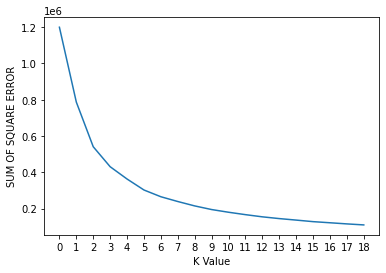

In [25]:
n_clusters = 6
n_dim = 2
file_out = "" # save predict label
# file_out = "/content/drive/MyDrive/Colab_Notebooks/Mining of massive datasets/FinalExam/Label_pre_Kmeans_100000_2d.json"

fastText_file = "/content/drive/MyDrive/Colab_Notebooks/Mining of massive datasets/FinalExam/fasttext_vec100.json"
sentences_fastText, vectors_fastText = loadFastText(fastText_file, 100000)

data_fastText = pd.DataFrame(vectors_fastText)
data_fastText_std = StandardScaler().fit_transform(data_fastText)

elbow(data_fastText_std, n_dim, "pca")

PCA-FastText


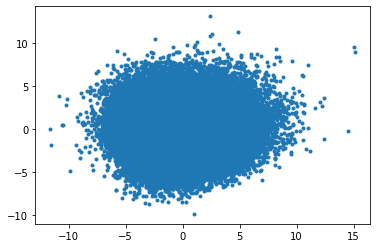

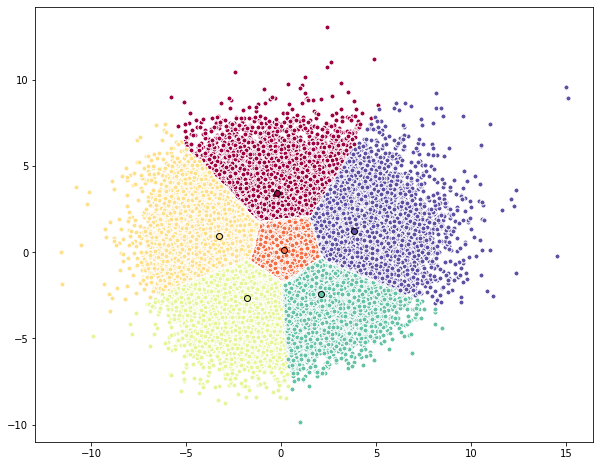

Runtime of the program is 5.6249589920043945


In [26]:
print("PCA-FastText")
clustering_kmeans(n_clusters, data_fastText_std, n_dim, "pca", file_out, sentences_fastText)

ICA-FastText


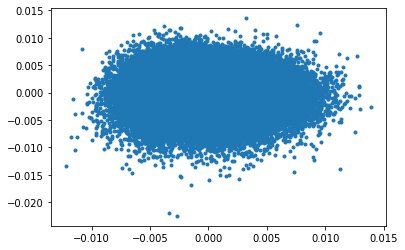

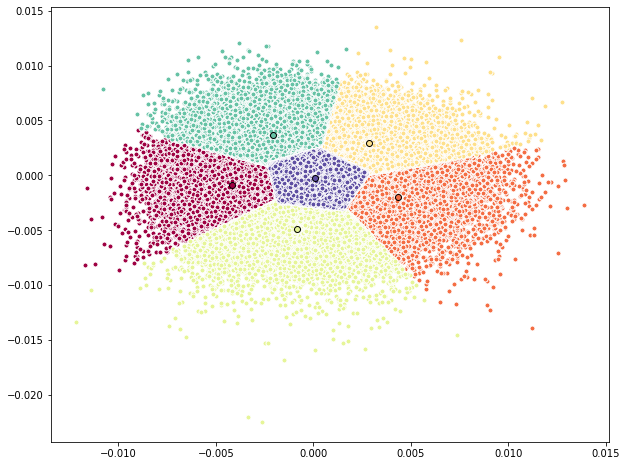

Runtime of the program is 6.866827964782715


In [27]:
print("ICA-FastText")
clustering_kmeans(n_clusters, data_fastText_std, n_dim, "ica", file_out, sentences_fastText)

In [28]:
bert_file = "/content/drive/MyDrive/Colab_Notebooks/Mining of massive datasets/FinalExam/bert_vec100.json"
sentences_bert, vectors_bert = loadBert(bert_file)

data_bert = pd.DataFrame(vectors_bert)
data_bert_std = StandardScaler().fit_transform(data_bert)

# elbow(data_bert_std, n_dim, "pca")

PCA-BERT


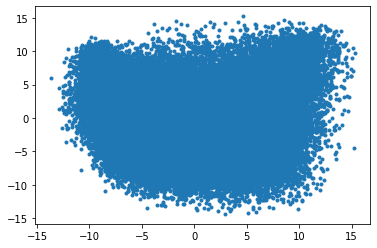

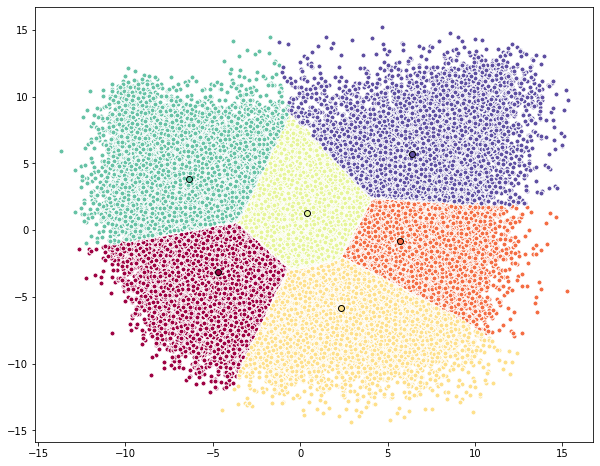

Runtime of the program is 10.635033369064331


In [29]:
print("PCA-BERT")
clustering_kmeans(n_clusters, data_bert_std, n_dim, "pca", file_out, sentences_bert)

ICA-BERT


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


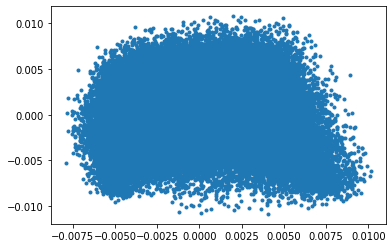

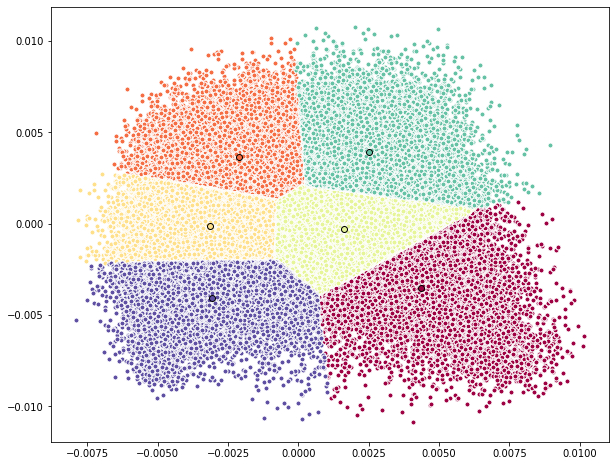

Runtime of the program is 41.111297607421875


In [30]:
print("ICA-BERT")
clustering_kmeans(n_clusters, data_bert_std, n_dim, "ica", file_out, sentences_bert)